<a href="https://colab.research.google.com/github/pedrobiqua/MineracaoDadosDados/blob/main/analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mineração de dados

Nesse trabalho estamos retirando informações dos dados da base de dados **Census Income**.

Como metodologia, estamos aplicando o processo de **KDD (Knowledge Discovery in Databases)**, onde teremos as seguintes etapas:

- **Seleção dos dados**:  
  Escolha dos atributos relevantes da base Census Income para o problema proposto.

- **Pré-processamento**:  
  Tratamento dos dados, incluindo:
  - Conversão de variáveis categóricas em formato numérico.
  - Normalização de variáveis numéricas.

- **Transformação dos dados (Feature Engineering)**:  
  Criação de novas variáveis para enriquecer o conjunto de dados, como:
  - Criação de faixas etárias a partir da variável `age`.
  - Tempo Livre(`free_time`).
  - Proporção de anos estudados(`education_age_ratio`).
  - Cálculo de `capital_net` (`capital-gain` - `capital-loss`).
  - Simplificação do estado civil (`is_married`).

- **Mineração de dados**:  
  Aplicação de algoritmos de Machine Learning para identificar padrões e realizar a tarefa de classificação da renda (`<=50K` ou `>50K`).

- **Interpretação/Evaluação dos resultados**:  
  Análise dos resultados obtidos pelos modelos, avaliando métricas como:
  - acurácia.
  - precisão.
  - recall.
  - F1-score.

---

**Autores**: Pedro Bianchini de Quadros e Lucas Fernando Assunção Cavalherie  
**Fonte**: [Census Income Dataset - UCI](https://archive.ics.uci.edu/dataset/20/census+income)

## Pendências

- Arrumar os dataframes, deixar tudo organizado;
- Testar com outros classificadores;
  - Pegar os que tem a melhor acurácia média
- Ver porque o Kmeans mudou o resultado, deve ser por conta de não ter seed/ os df estarem ruins;
- Ver com o Lucas quais outros plots a gene pode fazer para melhorar no artigo

## Importando Bibliotecas Necessarias para analise dos dados

In [1]:
%pip install category_encoders
%pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

## Importando Banco de Dados

In [3]:
adult = fetch_ucirepo(id=2)

In [4]:
# data (as pandas dataframes)
df = adult.data.features.copy()
df['income'] = adult.data.targets


print(df.shape)

(48842, 15)


In [5]:
# metadata
adult.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

In [6]:
# variable information
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


## Pre-Processamento dos dados

In [7]:
def verificar_nulos(df):
    """
    Verifica se existem valores nulos em um DataFrame ou Series do pandas.

    Args:
        df (pd.DataFrame ou pd.Series): Objeto pandas a ser verificado.

    Returns:
        True se houver nulos, False caso contrário.
    """
    if not isinstance(df, (pd.DataFrame, pd.Series)):
        raise TypeError("O objeto precisa ser um pandas DataFrame ou Series.")
    return df.isnull().values.any()

def percentual_nulos(df):
    """
    Mostra o percentual de valores nulos por coluna de um DataFrame.

    Args:
        df (pd.DataFrame): O DataFrame a ser analisado.

    Returns:
        pd.Series: Série com o percentual de nulos por coluna.
    """
    return (df.isnull().mean() * 100).sort_values(ascending=False)

In [8]:
verificar_nulos(df)

np.True_

In [9]:
percentual_nulos(df)

,0
occupation,1.977806
workclass,1.971664
native-country,0.560993
fnlwgt,0.000000
education,0.000000
education-num,0.000000
age,0.000000
marital-status,0.000000
relationship,0.000000
sex,0.000000


In [10]:
# Remove linhas com valores nulos
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Remove o index
df = df.drop(columns=['fnlwgt'])

percentual_nulos(df)

,0
age,0.0
workclass,0.0
education,0.0
education-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
sex,0.0
capital-gain,0.0


## Análise das variaveis

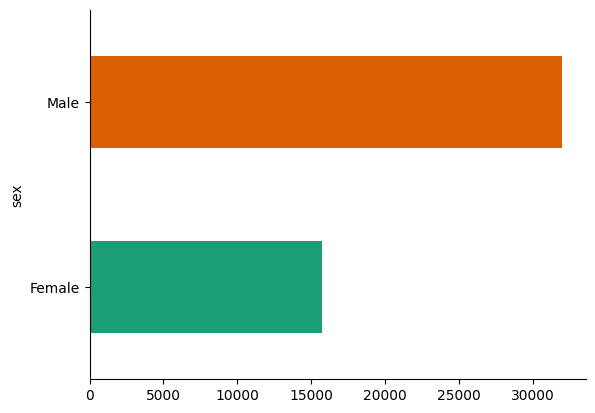

In [11]:
# @title sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-12-8bc583eef501>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='marital-status', inner='box', palette='Dark2')


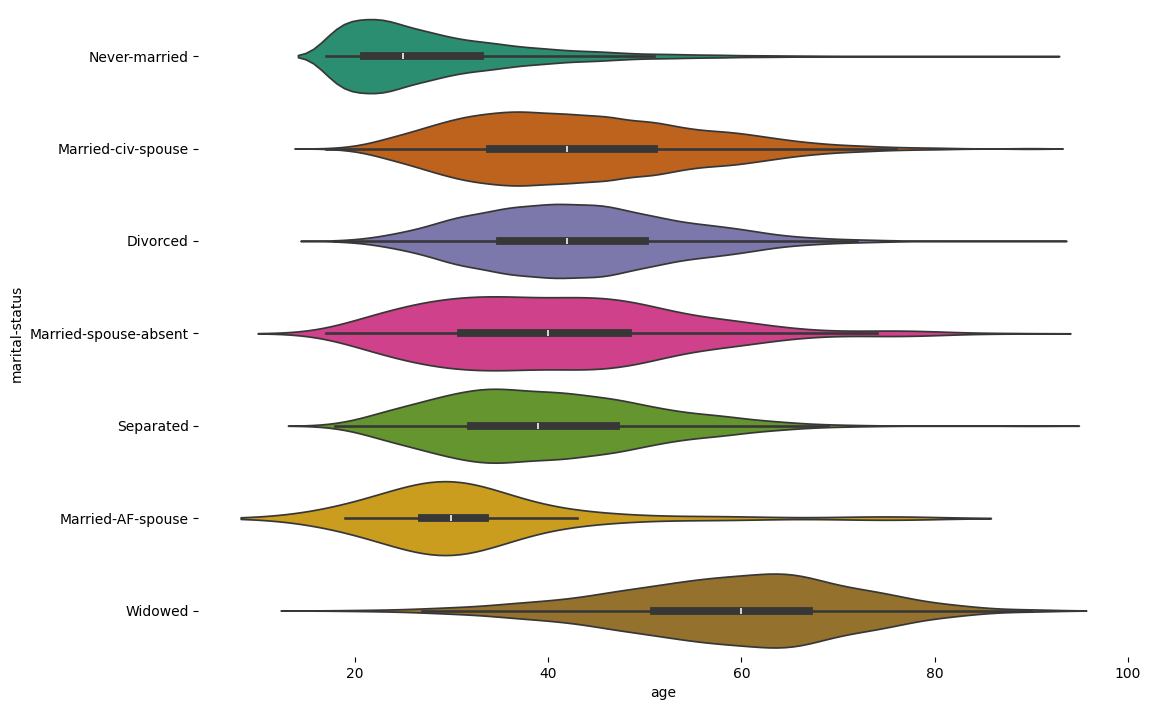

In [12]:
# @title marital-status vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['marital-status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='marital-status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Transformação dos dados

### Feature Engineering

Criação da faixa etária

| Faixa | Idade |
|---------|-------|
| Jovem |(18–25)|
| Adulto |(26–45)|
| Meia-idade |(46–65)|
| Idoso|(66+)|

In [13]:
# df['age_group'] = pd.cut(df['age'], bins=[0,25,45,65,100], labels=['Young','Adult','Middle-Aged','Senior'])

"Capital líquido"

In [14]:
# df['capital_net'] = df['capital-gain'] - df['capital-loss']

Proporção de anos estudados por idade

In [15]:
# df['education_age_ratio'] = df['education-num'] / df['age']

Tempo livre

É calculado usando as horas trabalhadas na semana, menos as 168 horas totais da semana

$$
24 \times 7 = 168 - horas \space trabalhadas

$$

In [16]:
# df['free_time'] = 168 - df['hours-per-week']

Casado ou não

In [17]:
# df['is_married'] = df['marital-status'].apply(lambda x: 1 if x == 'Married-civ-spouse' else 0)

Obs: Posso combinar mais features, ver dedpois com o Lucas

### Encoding de Features

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder

# Colunas categóricas por tipo de codificação
one_hot_cols = [
    "workclass",
    "marital-status",
    "relationship",
    "race",
    "sex",
    # "age_group"
]
ordinal_col = ["education"]
target_enc_cols = ["occupation", "native-country"]

# Colunas numéricas (incluindo as derivadas)
numeric_cols = [
    "age",
    # "fnlwgt",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    # "capital_net",
    # "education_age_ratio",
    # "free_time",
    # "is_married"
]

# Ordem correta para encoding ordinal da escolaridade
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
    '10th', '11th', '12th', 'HS-grad', 'Some-college',
    'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate'
]

df_corr = df.copy()

# Encoders
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ordinal_enc = OrdinalEncoder(categories=[education_order])
target_enc = TargetEncoder()

# ColumnTransformer
encoder = ColumnTransformer(transformers=[
    ('onehot', one_hot_enc, one_hot_cols),
    ('ordinal', ordinal_enc, ordinal_col),
    ('target', target_enc, target_enc_cols),
    ('numeric', 'passthrough', numeric_cols)
])

In [19]:
X = df.drop(columns='income')
y = df['income']

X_encoded = encoder.fit_transform(X, y)
X_encoded

array([[   0.,    0.,    0., ..., 2174.,    0.,   40.],
       [   0.,    0.,    0., ...,    0.,    0.,   13.],
       [   0.,    0.,    0., ...,    0.,    0.,   40.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,   50.],
       [   0.,    0.,    0., ..., 5455.,    0.,   40.],
       [   0.,    0.,    0., ...,    0.,    0.,   60.]])

In [20]:
# 1. Pegue os nomes das colunas do OneHotEncoder
onehot_feature_names = encoder.named_transformers_['onehot'].get_feature_names_out(one_hot_cols)

# 2. Junte os nomes de todas as colunas, na mesma ordem que foram passadas no ColumnTransformer
all_feature_names = list(onehot_feature_names) + ordinal_col + target_enc_cols + numeric_cols

# 3. Crie o DataFrame com os dados transformados e os nomes
df_final = pd.DataFrame(X_encoded, columns=all_feature_names)
df_final['income'] = y.values

In [21]:
df_corr

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47616,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
47617,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
47618,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
47619,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.033327      0.078006      0.057772   
education-num   0.033327       1.000000      0.125569      0.081799   
capital-gain    0.078006       0.125569      1.000000     -0.031691   
capital-loss    0.057772       0.081799     -0.031691      1.000000   
hours-per-week  0.079306       0.143727      0.082279      0.055360   

                hours-per-week  
age                   0.079306  
education-num         0.143727  
capital-gain          0.082279  
capital-loss          0.055360  
hours-per-week        1.000000  


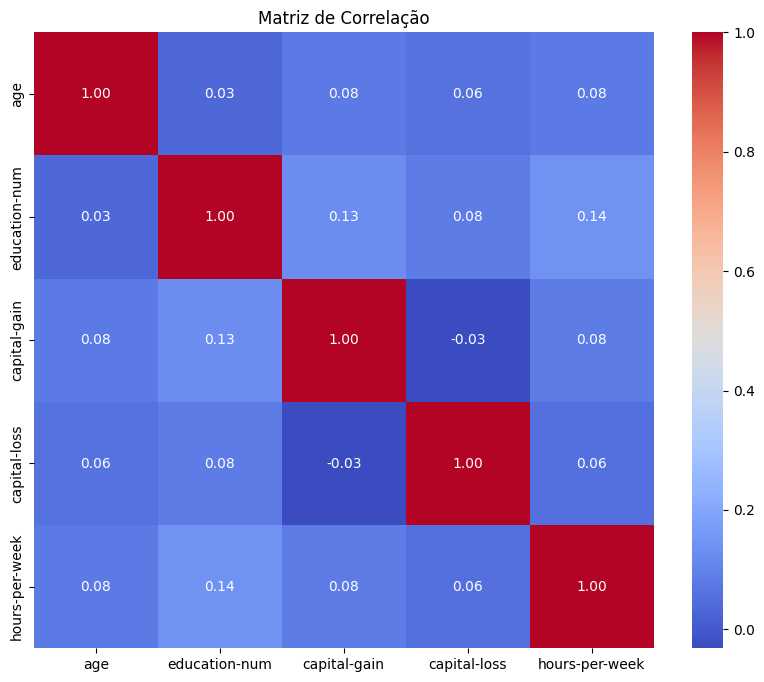

In [22]:
# @title Corelações entre as variaveis

import seaborn as sns
import matplotlib.pyplot as plt

# Exclui colunas apenas para ver as correlações
df_corr = df_corr.drop(columns=['income'])
cols_to_drop = one_hot_cols + ordinal_col + target_enc_cols
df_corr = df_corr.drop(columns=cols_to_drop)

correlacoes = df_corr.corr()

# Exibe a matriz
print(correlacoes)

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



### Algoritmos de Scaling

In [23]:
# TODO: Ver com o Lucas, se é necessário

### Resultados Transformações

In [24]:
df_final

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,...,sex_Male,education,occupation,native-country,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,12.0,0.599213,0.815587,39.0,13.0,2174.0,0.0,40.0,<=50K
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,12.0,1.285573,0.815587,50.0,13.0,0.0,0.0,13.0,<=50K
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,8.0,0.470474,0.815587,38.0,9.0,0.0,0.0,40.0,<=50K
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,0.470474,0.815587,53.0,7.0,0.0,0.0,40.0,<=50K
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,1.223241,0.801471,28.0,13.0,0.0,0.0,40.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47616,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,12.0,1.223241,0.815587,33.0,13.0,0.0,0.0,40.0,<=50K.
47617,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,12.0,1.223241,0.815587,39.0,13.0,0.0,0.0,36.0,<=50K.
47618,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,12.0,1.223241,0.815587,38.0,13.0,0.0,0.0,50.0,<=50K.
47619,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,12.0,0.599213,0.815587,44.0,13.0,5455.0,0.0,40.0,<=50K.


## Machine Learning

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separando X e y
X = df_final.drop(columns=['income'])
y = df_final['income']

# Separar para classificação e regressão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Classificação

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("🔷 Random Forest - Classificação")
print(classification_report(y_test, y_pred))


🔷 Random Forest - Classificação
              precision    recall  f1-score   support

       <=50K       0.61      0.76      0.68      4924
      <=50K.       0.28      0.17      0.21      2246
        >50K       0.49      0.48      0.49      1617
       >50K.       0.22      0.13      0.17       738

    accuracy                           0.53      9525
   macro avg       0.40      0.39      0.39      9525
weighted avg       0.48      0.53      0.50      9525



### Regressão

In [28]:
# from sklearn.linear_model import LinearRegression

# # Converter alvo para binário
# y_num = y.map({'<=50K': 0, '>50K': 1})
# X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_num, test_size=0.2, random_state=42)

# X_train_r_scaled = scaler.fit_transform(X_train_r)
# X_test_r_scaled = scaler.transform(X_test_r)

# reg = LinearRegression()
# reg.fit(X_train_r_scaled, y_train_r)
# y_pred_r = reg.predict(X_test_r_scaled)

# print("🔶 Linear Regression - Regressão")
# print("MSE:", mean_squared_error(y_test_r, y_pred_r))


### Clusterização

🟣 KMeans - Clusterização
Silhouette Score: 0.9862778797458366


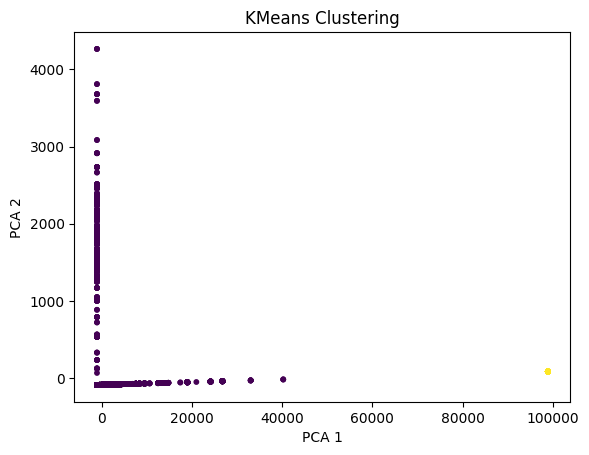

In [29]:
from sklearn.cluster import KMeans

# PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Avaliação
score = silhouette_score(X, labels)
print("🟣 KMeans - Clusterização")
print("Silhouette Score:", score)

# Visualização
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title("KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


### Compilado dos Algoritmos

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

def rodar_pipeline_modelos(df_final):
    resultados = []

    # Separar variáveis
    X = df_final.drop(columns=['income'])
    y_class = df_final['income']
    # y_reg = y_class.map({'<=50K': 0, '>50K': 1})

    # Dividir em treino/teste
    X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
    # _, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

    # Escalar os dados
    scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)
    # X_scaled = scaler.fit_transform(X)

    ### CLASSIFICAÇÃO ###
    param_grid = {
        'n_estimators': [50, 100, 200],            # número de árvores
        'max_depth': [None, 10, 20],               # profundidade máxima
        'min_samples_split': [2, 5, 10],           # mínimo de amostras para dividir
        'max_features': ['sqrt', 'log2']           # número de features consideradas no split
    }


    # Configurando o GridSearchCV
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        scoring='accuracy',
        cv=3,
        n_jobs=-1
    )

    # Executando o GridSearch nos dados de treino
    grid_search.fit(X_train, y_train)

    # Usando o melhor modelo encontrado para prever
    best_clf = grid_search.best_estimator_
    y_pred_class = best_clf.predict(X_test)

    # Gerando o relatório de classificação
    report = classification_report(y_test, y_pred_class, output_dict=True)

    # Salvando os resultados
    resultados.append({
        'Tipo': 'Classificação',
        'Algoritmo': 'Random Forest',
        'Métrica': 'Acurácia',
        'Valor': report['accuracy'],
        'Melhores Parâmetros': grid_search.best_params_
    })
    # resultados.append({
    #     'Tipo': 'Classificação',
    #     'Algoritmo': 'Random Forest',
    #     'Métrica': 'F1 (>50K)',
    #     'Valor': report['>50K']['f1-score'],
    #     'Melhores Parâmetros': grid_search.best_params_
    # })

    ### CLUSTERIZAÇÃO ###
    # kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    # labels = kmeans.fit_predict(X_scaled)
    # silhouette = silhouette_score(X_scaled, labels)
    # resultados.append({
    #     'Tipo': 'Clusterização',
    #     'Algoritmo': 'KMeans',
    #     'Métrica': 'Silhouette Score',
    #     'Valor': silhouette
    # })

    # Converter para DataFrame
    return pd.DataFrame(resultados)


In [31]:
resultados_df = rodar_pipeline_modelos(df_final)
print(resultados_df)

            Tipo      Algoritmo   Métrica     Valor  \
0  Classificação  Random Forest  Acurácia  0.588136   

                                 Melhores Parâmetros  
0  {'max_depth': 10, 'max_features': 'sqrt', 'min...  


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
